In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Regression 1

In [ ]:
df1 = pd.read_csv("regression_1.csv")
df1.head()

,x1,x2
0,0.0,-0.674904
1,0.1,-0.479806
2,0.2,-0.806082
3,0.3,0.053077
4,0.4,-0.393342


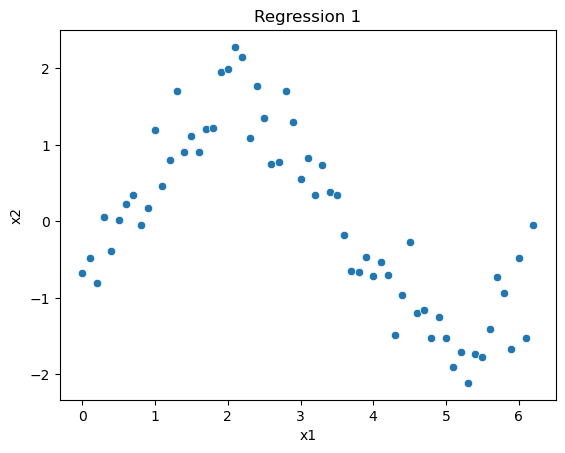

In [ ]:
sns.scatterplot(data = df1, x = 'x1', y = 'x2')
plt.title("Regression 1")
plt.show()

In [ ]:
from ipywidgets import interact

In [ ]:
def cubicFunction(x, a, b, c, d):
    return a * (x**3) + b * (x ** 2) + c * x + d

In [ ]:
x = np.arange(0, 7, 0.2)

@interact(a = (0, 1, 0.01), b = (-5.0, 5.0, 0.1), c = (-5.0, 5.0, 0.1), d = (-5.0, 5.0, 0.1))
def plot_cubic_line(a = 0, b = 0, c = 0, d = 0):
    line = cubicFunction(x, a, b, c, d)
    plt.plot(x, line, '--', color='magenta', linewidth=3)
    sns.scatterplot(data = df1, x = 'x1', y = 'x2')
    plt.title("Regression 1")
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, step=0.01), FloatSlider(value=0.0, desc…

In [ ]:
from scipy.optimize import minimize, curve_fit

In [ ]:
X = np.asarray(df1['x1'])
y = df1['x2']

In [ ]:
values = curve_fit(cubicFunction, X, y)[0]
print(values)

[ 0.13173672 -1.40007837  3.71156124 -1.41330912]


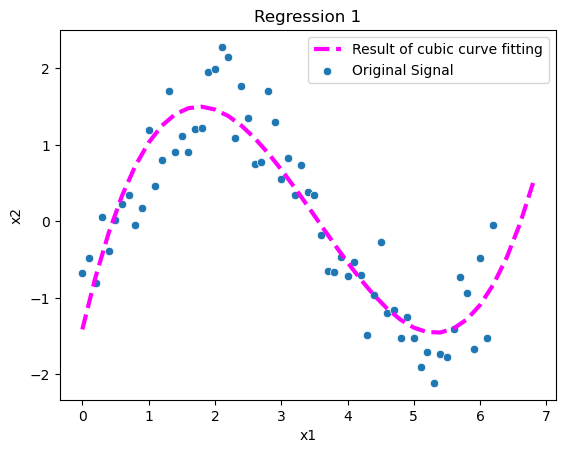

In [ ]:
x = np.arange(0, 7, 0.2)
y_fit = cubicFunction(x, *values)

plt.plot(x, y_fit, '--', color='magenta', linewidth=3,
          label="Result of cubic curve fitting")
sns.scatterplot(data = df1, x = 'x1', y = 'x2', label="Original Signal")
plt.title("Regression 1")
plt.savefig("Regression1.png", bbox_inches="tight")
plt.legend(loc="upper right")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
y

0    -0.674904
1    -0.479806
2    -0.806082
3     0.053077
4    -0.393342
        ...   
58   -0.930421
59   -1.674052
60   -0.473458
61   -1.529905
62   -0.043282
Name: x2, Length: 63, dtype: float64

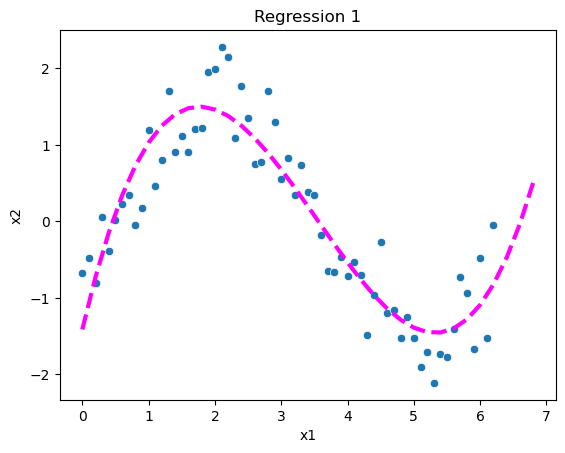

In [ ]:
# create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X.reshape(-1,1))

reg = LinearRegression()
reg.fit(X_poly, y)

x = np.arange(0, 7, 0.2)
y_fit = reg.predict(poly.fit_transform(x.reshape(-1,1)))

plt.plot(x, y_fit, '--', color='magenta', linewidth=3)
sns.scatterplot(data = df1, x = 'x1', y = 'x2')
plt.title("Regression 1")
plt.show()

In [ ]:
reg.coef_

array([ 0.        ,  3.71156121, -1.40007835,  0.13173672])

## Regression 2

In [ ]:
df2 = pd.read_csv("regression_2.csv")
df2.head()

,x1,x2
0,-10.0,0.070295
1,-9.0,-0.045762
2,-8.0,0.044281
3,-7.0,-0.012570
4,-6.0,0.208319


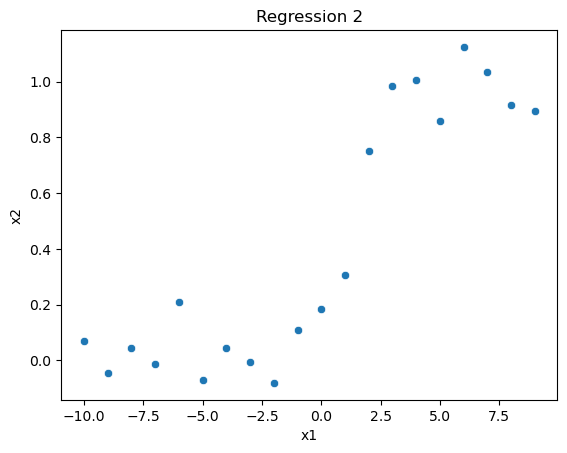

In [ ]:
sns.scatterplot(data = df2, x = 'x1', y = 'x2')
plt.title("Regression 2")
plt.show()

In [ ]:
x = np.arange(-10, 8, 0.2)

@interact(a = (0, 1, 0.01), b = (-5.0, 5.0, 0.1), c = (-5.0, 5.0, 0.1), d = (-5.0, 5.0, 0.1))
def plot_cubic_line(a = 0, b = 0, c = 0, d = 0):
    line = cubicFunction(x, a, b, c, d)
    plt.plot(x, line, '--', color='magenta', linewidth=3)
    sns.scatterplot(data = df2, x = 'x1', y = 'x2')
    plt.title("Regression 2")
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, step=0.01), FloatSlider(value=0.0, desc…

In [ ]:
X = np.asarray(df2['x1'])
y = df2['x2']

In [ ]:
values = curve_fit(cubicFunction, X, y)[0]
print(values)

[-0.00090745  0.00148245  0.12407203  0.38341886]


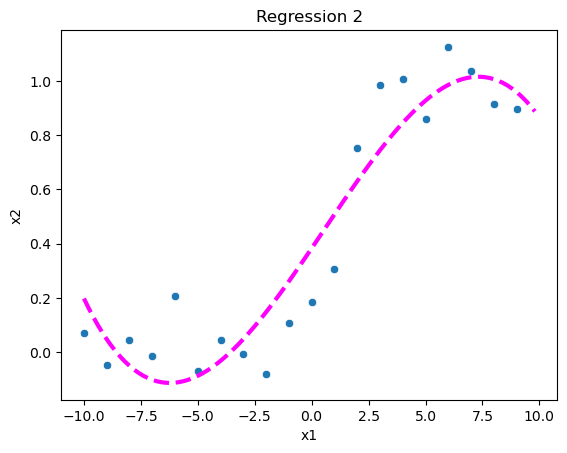

In [ ]:
x = np.arange(-10, 10, 0.2)
y_fit = cubicFunction(x, *values)

plt.plot(x, y_fit, '--', color='magenta', linewidth=3)
sns.scatterplot(data = df2, x = 'x1', y = 'x2')
plt.title("Regression 2")
plt.show()

In [ ]:
def linearFunction(x, m, b):
    return m * x + b

In [ ]:
values = curve_fit(linearFunction, X, y)[0]
print(values)

[0.06777987 0.45030717]


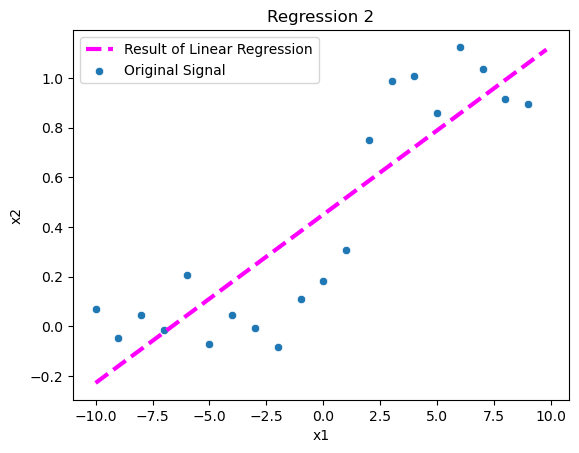

In [ ]:
x = np.arange(-10, 10, 0.2)
y_fit = linearFunction(x, *values)

plt.plot(x, y_fit, '--', color='magenta', linewidth=3,
         label="Result of Linear Regression")
sns.scatterplot(data = df2, x = 'x1', y = 'x2', label="Original Signal")
plt.title("Regression 2")
plt.savefig("Regression2.png", bbox_inches="tight")
plt.show()

In [ ]:
from sklearn.svm import SVR

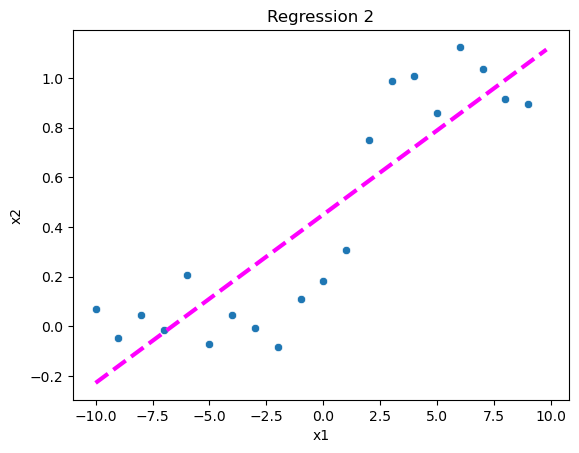

In [ ]:
x = np.arange(-10, 10, 0.2)
reg.fit(X.reshape(-1, 1), y)
y_fit = reg.predict(x.reshape(-1, 1))
#y_fit = cubicFunction(x, *values)

plt.plot(x, y_fit, '--', color='magenta', linewidth=3)
sns.scatterplot(data = df2, x = 'x1', y = 'x2')
plt.title("Regression 2")
plt.show()

## Classification

In [ ]:
df3 = pd.read_csv("classification.csv")
df3.head()

,x1,x2,label
0,-10.097950,-3.230260,1
1,-2.255579,5.107107,0
2,-10.562037,-3.919005,1
3,-0.126070,3.079037,0
4,-9.249422,-4.100176,1


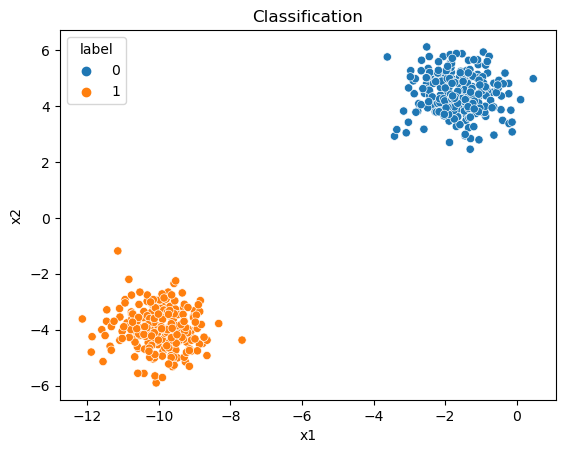

In [ ]:
sns.scatterplot(data = df3, x = 'x1', y = 'x2', hue = 'label')
plt.title("Classification")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = np.asarray(df3.drop('label', axis = 1))
y = df3['label']

In [ ]:
classifier = LogisticRegression()
classifier.fit(X, y)

LogisticRegression()

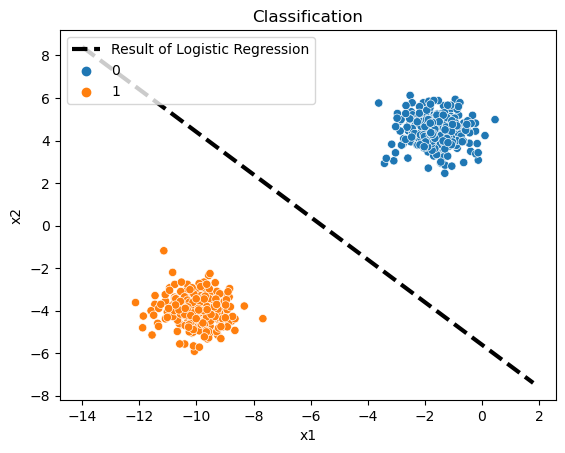

In [ ]:
b = classifier.intercept_[0]
w1, w2 = classifier.coef_.T

b = -b/w2
m = -w1/w2
x = np.arange(-14, 2, 0.2)
line = linearFunction(x, m, b)
plt.plot(x, line, '--', color='black', linewidth=3,
         label="Result of Logistic Regression")
sns.scatterplot(data = df3, x = 'x1', y = 'x2', hue = 'label')
plt.title("Classification")
plt.legend(title="", loc="upper left")
plt.savefig("Classification.png", bbox_inches="tight")
plt.show()